<a href="https://colab.research.google.com/github/doandongdu/DUDOAN12/blob/main/NHAN_DIEN_FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
label = ['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']

In [ ]:
train_image = '/content/drive/MyDrive/nhan_dien_food/Data/Train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')

Found 887 images belonging to 10 classes.


In [ ]:
x_train,y_train=next(train_set)
x_train.shape
y_train.shape

(32, 10)

In [ ]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               61440512  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 61,708,298
Trainable params: 61,708,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 250, batch_size = 128)

In [ ]:
model.save('nhan_dien_food.h5')

1/1 [==============================] - 0s 82ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 47ms/step
Đây là: banh_mi


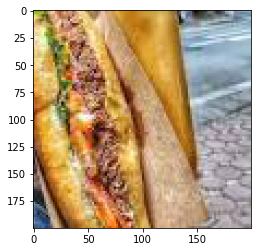

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhan_dien_food/Data/Test/banh_mi/BanhMi5.jpeg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])